## Getting Started - Importing Libraries

In order to use Python in order to work with data, we need to first tell Python that we wish to make certain tools available to us. In order to do that, we need to import some libraries. 

In [1]:
# Allows us to create Data Frames.
import pandas as pd

# Stops matplotlib from opening a new window for our plots. 
%matplotlib inline

# Imports plotting functionality.
import matplotlib.pyplot as plt

# Imports the ability to calculate statistics.
import numpy as np

## Summary Statistics

Before we start importing data, we are going to play around with the basic functionality of our statistics using a list. 

In [2]:
# This is a list of commute times collected from various students. 
commute = [15, 17, 17, 18, 19, 19, 20, 20, 21, 21, 21, 22, 23, 24, 26, 26, 31, 36, 38]

At this point, we can calculate things like mean, standard deviation, and variance.

In [3]:
# This is the mean of our list. 
np.mean(commute)

22.842105263157894

In [4]:
# This is the POPULATION standard deviation.
np.std(commute) 

6.072051226248246

In [5]:
# This is the SAMPLE standard deviation. 
# np.std() defaults to population standard deviation. For sample SD, set ddof = 1.
np.std(commute, ddof = 1) 

6.238439600971605

In [6]:
# This is the POPULATION variance. 
np.var(commute)

36.86980609418283

In [7]:
# This is the SAMPLE variance. 
# np.var() defaults to population variance. For sample variance, set ddof = 1.
np.var(commute, ddof = 1)

38.918128654970765

We can also determine the length of our list, as well as our five-number summary.

In [8]:
# Calculates the sample size.
len(commute)

19

In [9]:
# This computes the median.
np.median(commute)

21.0

In [10]:
# This computes the quartiles, minimum, and maximum for our list.
quartiles = np.percentile(commute, [25, 50, 75])
commute_min, commute_max = np.min(commute), np.max(commute)
print('Min: ', commute_min)
print('Q1: ', quartiles[0])
print('Q2: ', quartiles[1])
print('Q3: ', quartiles[2])
print('Max: ', commute_max)

Min:  15
Q1:  19.0
Q2:  21.0
Q3:  25.0
Max:  38


## Importing Data

Without knowing how to import data, knowing how to calculate the statistics will only get us so far. In order for us to import data, we must know how to direct our program to the file we wish to import. Ask Mr. Smith if you are unsure how to do this when reviewing later.

In [11]:
# Imports our data from "The National Longitudinal Study 
# of Adolescent to Adult Health". More information at https://www.cpc.unc.edu/projects/addhealth
df = pd.read_csv('data/add_health_data.csv', index_col=None, encoding='utf-8')

In [12]:
# Shows the first ten entries of the data frame. This is useful to gain a sense of what your data looks like. 
df.head(10)

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,
5,5710464,1,14.50958904,,,,,,,,...,,,,,,,,,,
6,5710467,1,13.67671233,,,,,,,,...,,,,,,,,,,
7,5710962,1,15.17808219,11,2,2008,2288258,258,1,V5.5,...,,,,,,,,,,
8,5711089,1,14.6739726,,,,,,,,...,,,,,,,,,,
9,5711107,1,14.9260274,6,29,2008,2288260,260,1,V5.4,...,0,0,0,0,0,0,0,0,1,2


Having a data frame provides us with some extra perks in Python, allowing us to quickly determine frequencies and find the mean, standard deviation, and the five-number summary.

In [13]:
# This tells you all unique entries in the BIO_SEX column.
df.BIO_SEX.unique()

array([2, 1, 6])

In [14]:
# This determines the frequency for each category.  
df.BIO_SEX.value_counts()

2    3356
1    3147
6       1
Name: BIO_SEX, dtype: int64

In [15]:
# For data frames, df.COLUMN_NAME.describe() will tell you the count, mean, standard deviation, and 
# five-number summary for COLUMN_NAME. 
df['BIO_SEX'].describe()
# It is worth noting that since we understand these numbers represent categorical data, it does not 
# make much sense to compute these things. However, this is a demonstration that we could if necessary.

count    6504.000000
mean        1.516759
std         0.502825
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: BIO_SEX, dtype: float64

In [16]:
# .describe() also works for non-numeric data, although it will only give us relevant information.
df.agew1.describe()

count     6504
unique     194
top           
freq      1667
Name: agew1, dtype: object

In [17]:
# Since 'agew1' is a column that should give us the age of the individuals, it should be numeric. 
# However, it seems to have been imported as a non-numeric type of data (see above). 
# This code will turn our column into numeric information. 
columns_to_change = {'agew1'}
for col in columns_to_change:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
# Now when we run the .describe() command on 'agew1', we obtain the mean, standard deviation, and 
# five-number summary that we should expect.
df.agew1.describe()

count    4837.000000
mean       16.541548
std         1.581993
min        12.676712
25%        15.257534
50%        16.512329
75%        17.761644
max        21.934247
Name: agew1, dtype: float64

## Graphical Summaries

### Bar Plots

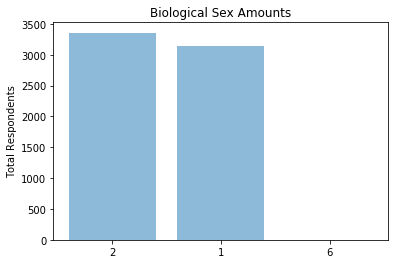

In [19]:
categories = df.BIO_SEX.unique()
amounts = df.BIO_SEX.value_counts()
axis_space = np.arange(len(categories))

plt.bar(axis_space, amounts, align = 'center', alpha = 0.5)
plt.xticks(axis_space, categories)
plt.ylabel('Total Respondents')
plt.title('Biological Sex Amounts')
plt.show()

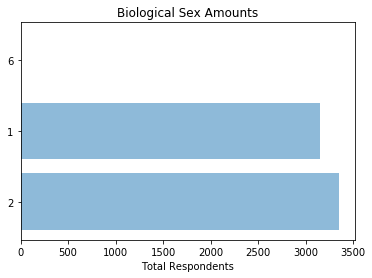

In [20]:
categories = df.BIO_SEX.unique()
amounts = df.BIO_SEX.value_counts()
axis_space = np.arange(len(categories))

plt.barh(axis_space, amounts, align = 'center', alpha = 0.5)
plt.yticks(axis_space, categories)
plt.xlabel('Total Respondents')
plt.title('Biological Sex Amounts')
plt.show()

### Pie Charts

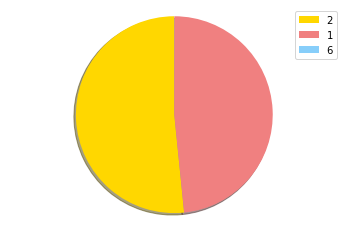

In [21]:
labels = df.BIO_SEX.unique()
sizes = df.BIO_SEX.value_counts()
colors = ['gold', 'lightcoral', 'lightskyblue']

# You can include this code instead of the following two lines containing 'patches' if you prefer to have your 
# labels on the wedges of the chart.
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#autopct='%1.1f%%', shadow=True, startangle=140)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90) # Remove if alternate code
plt.legend(patches, labels, loc="best") #Remove if alternate code

plt.axis('equal')
plt.show()

### Box Plots

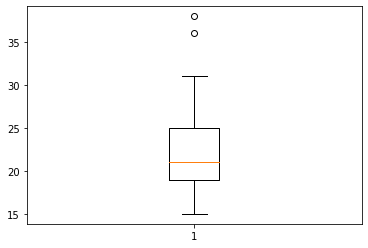

In [22]:
plt.boxplot(commute);

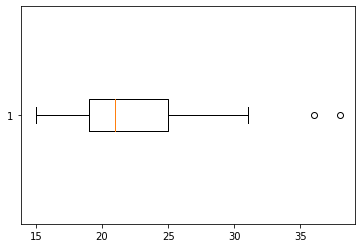

In [23]:
plt.boxplot(commute, vert=False);

### Time-series Plot

In [24]:
dji = pd.read_csv('data/DJI.csv')

In [25]:
dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/1/2014,17040.46094,17395.53906,15855.12012,17390.51953,17390.51953,2903240000
1,11/1/2014,17390.90039,17894.83008,17278.35938,17828.24023,17828.24023,1516490000
2,12/1/2014,17827.26953,18103.44922,17067.58984,17823.07031,17823.07031,2216900000
3,1/1/2015,17823.07031,17951.77930,17136.30078,17164.94922,17164.94922,2173260000
4,2/1/2015,17169.99023,18244.38086,17037.75977,18132.69922,18132.69922,1751250000


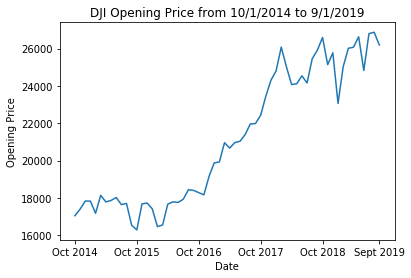

In [26]:
import datetime

x = dji.Date
y = dji.Open

plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('DJI Opening Price from 10/1/2014 to 9/1/2019')
plt.plot(x,y)
# Here, the numbers indicate the position from left to right that each label should be at.
# The words after indicate what to display at each label.
# Since this is monthly data, we can count by 12s to place our labels once each year. 
plt.xticks([0, 12, 24, 36, 48, 59], ('Oct 2014', 'Oct 2015', 'Oct 2016', 'Oct 2017', 'Oct 2018', 'Sept 2019'))
plt.show()